本章では**教師なし学習**に属するクラスタ分析について学習していく
- k-means（k平均法）を使って類似点の中心を見つけ出す
- 階層的クラスタ木をボトムアップ方式で構築する
- 密度に基づくクラスタリングアプローチを使ってオブジェクトの任意の形状を識別する

### 11.1 k-means法を使った類似度によるオブジェクトのグループ化
### 11.1.1 scikit-learnを使ったk-meansクラスタリング
クラスタリングのカテゴリには**プロトタイプベース(prototype-based)**クラスタリング、**密度ベース(density-based)**クラスタリング、**階層的(hierarchical)**クラスタリングがある。k-meansはプロトタイプベースクラスタリングである。

プロトタイプベースクラスタリングは、各クラスタがプロトタイプによって表されることを意味する。プロトタイプは**セントロイド(sentroid)**、**メドイド(medoid)**のどちらかになる。

* セントロイド：特徴量が連続値の場合に、類似する点の「中心」を表す。　簡単にいうと**連続値の中心**
* メドイド：特徴量がカテゴリ値の場合に、最も「代表的」または最も頻度の高い点を表す。　簡単にいうと**カテゴリの代表**

In [1]:
from sklearn.datasets import make_blobs

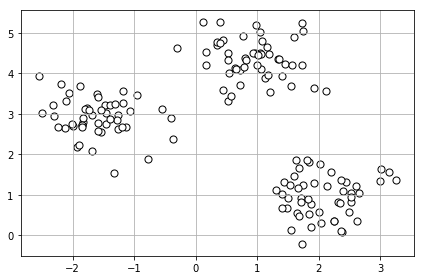

In [5]:
X, y = make_blobs(n_samples = 150,
                 n_features =2,
                 centers = 3,
                 cluster_std = 0.5,
                 shuffle = True,
                 random_state = 0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c = 'white', marker = 'o',edgecolor = 'black',s = 50)
plt.grid()
plt.tight_layout()
plt.show()

k-means法は以下の4つの手順にまとめることができる
- クラスタの中心の初期値として、サンプル点からk個のセントロイドをランダムに選びだす。
- 各サンプルを最も近いセントロイド$\mu^{(j)}$に割り当てる
- セントロイドに割り当てられたサンプルの中心に、セントロイドを移動する
- サンプル点へのクラスタの割り当てが変化しなくなるか、ユーザー定義の形容値またはイテレーションの最大回数に達するまで、手順2～3を繰り返す。

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =3,
           init = 'random',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

In [17]:
print(X[:5, :])

[[2.60509732 1.22529553]
 [0.5323772  3.31338909]
 [0.802314   4.38196181]
 [0.5285368  4.49723858]
 [2.61858548 0.35769791]]


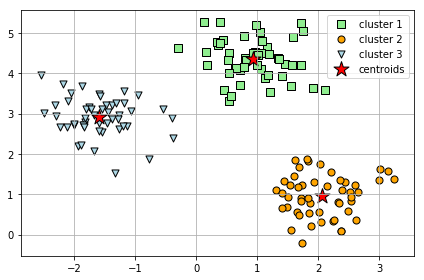

In [18]:
plt.scatter(X[y_km == 0, 0],
           X[y_km == 0,1],
           s = 50,
           c = 'lightgreen',
           edgecolor = 'black',
           marker = 's',
           label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s = 50,
           c = 'orange',
            edgecolor = 'black',
           marker = 'o',
           label = 'cluster 2')
plt.scatter(X[y_km == 2, 0],
           X[y_km == 2, 1],
           s = 50,
           c = 'lightblue',
            edgecolor = 'black',
            marker = 'v',
            label = 'cluster 3' )

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250,
           marker = '*',
           c = 'red',
           edgecolor = 'black',
           label = 'centroids')
plt.legend(loc = 'best')
plt.grid()
plt.tight_layout()
plt.show()

k-means法の問題点はクラスタの個数kを指定しなければいけないこと。

### 11.1.2 k-means++法を使ってセントロイドの初期値をよりスマートに設定する
1. 選択の対象となるk個のセントロイドを格納するために、空のデータセットMを初期化すうｒ。
1. 入力サンプルから初期のセントロイド$\mu^{(j)}$をランダムに選択し、Mに割り当てる
1. Mに含まれていないサンプル$x^{(i)}$ごとに、Mのセントロイドに対して距離の2乗$d(x^{(i)},M)^2$が最小となるセントロイドを求める。
1. 次のセントロイド$\mu^{(p)}$をランダムに選択するために、各サンプルとの距離によって重み付された確率分布を使用する。
1. k個のセントロイドが選択されるまで、手順３～４を繰り返す。
1. 従来のk-means法を使って引き続き処理を行う。

### 11.1.3 ハードクラスタリングとソフトクラスタリング
* ハードクラスタリング：データセットのサンプルがそれぞれ1つのクラスタに割り当てられること　
* ソフトクラスタリング：データセットのサンプルがそれぞれ**１つ以上**に割り当てられること。**ファジークラスタリング(fuzzy clustering)**とも呼ばれる

ソフトクラスタリングの代表的なもの:**Fuzzy C-means(FCM)**法、**Soft k-means or Fuzzy k-means**法とよばれる。

### 11.1.4 エルボー法を使ってクラスタの最適な個数を求める
KMeansモデルを適合したあとは、inertia_属性を通じてクラスタ内誤差平方和の値にアクセスできる。この歪みにもとづき**エルボー(elbow method)**法と呼ばれる図解により、タスクに最適なクラスタの個数kを推定できる。

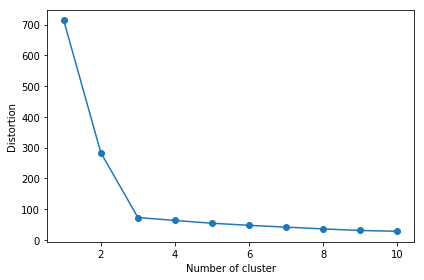

In [22]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 50,
               random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### 11.1.5 シルエット図を使ってクラスタリングの性能を数値化する
クラスタリングの性能を評価するためのもう1つの指標は**シルエット分析(silhouette analysis)**である。これは、クラスタ内のサンプルがどの程度密にグループ化されているか（凝集度）の目安となるグラフをプロットできる。
シルエット係数を計算するには次の3つの手順をする必要がある。
1. クラスタの**凝集度**$a^{(i)}$を計算する。この凝集度は、同一クラスタのサンプル$x^{(i)}$とほかの全サンプルとの平均距離を計算する。
1. 　最も近いクラスタからの**乖離度**$b^{(i)}$を計算する。この乖離度はサンプル$x^{(i)}$と最も近くにあるクラスタ内の全サンプルとの平均距離を計算する。
1. クラスタの凝集度と乖離度の差を、それらのうち大きい法の値で割り、シルエット係数$s^{(i)}$を計算する。

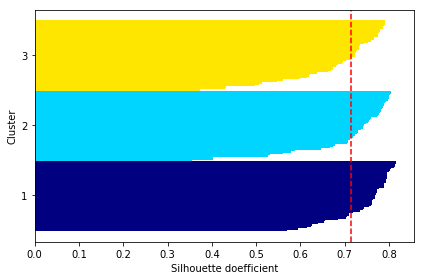

In [28]:
km = KMeans(n_clusters=3,
           init = 'k-means++',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

# 重複をなくす
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric= 'euclidean')
y_ax_lower ,y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
             color= color)
    yticks.append((y_ax_lower + y_ax_upper) /2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks ,cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette doefficient')
plt.tight_layout()
plt.show()

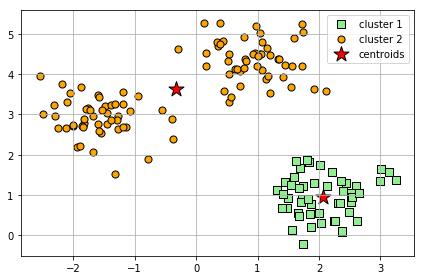

In [29]:
km = KMeans(n_clusters=2, 
           init = 'k-means++',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
           X[y_km == 0,1],
           s = 50,
           c = 'lightgreen',
           edgecolor = 'black',
           marker = 's',
           label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s = 50,
           c = 'orange',
            edgecolor = 'black',
           marker = 'o',
           label = 'cluster 2')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250,
           marker = '*',
           c = 'red',
           edgecolor = 'black',
           label = 'centroids')
plt.legend(loc = 'best')
plt.grid()
plt.tight_layout()
plt.show()

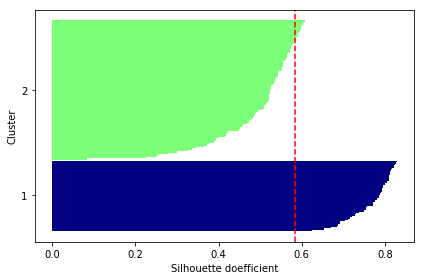

In [30]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric= 'euclidean')
y_ax_lower ,y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
             color= color)
    yticks.append((y_ax_lower + y_ax_upper) /2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks ,cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette doefficient')
plt.tight_layout()
plt.show()

#### k-means++ではなくk-meansでやってみた

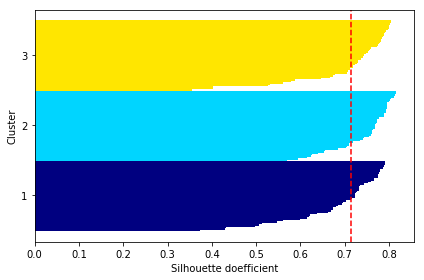

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =3,
           init = 'random',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric= 'euclidean')
y_ax_lower ,y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
             color= color)
    yticks.append((y_ax_lower + y_ax_upper) /2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks ,cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette doefficient')
plt.tight_layout()
plt.show()

## 11.2 クラスタを階層木として構成する
**階層的クラスタリング(hierarchical clustering)**アルゴリズムは、**樹形図(dendrogram)**をプロットできるのが利点である。樹形図は結果を解釈するのに役立つ。またクラスタの個数を事前に指定する必要がないのも利点である。

階層的クラスタリングには**凝集型**(agglomerative)と**分散型**(divisive)の2つのアプローチがある。
+ 凝集型：個々のサンプルを1つのクラスタとして扱い、クラスタが1つだけ残った状態になるまで、最も近くにある2つのクラスタをマージしていく
+ 分散型：すべてのクラスタにサンプルが1つだけ含まれた状態になるまで、クラスタをより小さなクラスタに分割していく。

### 11.2.1 ボトムアップ方式でのクラスタのグループ化
凝集型クラスタリングには、**単連結法**(single linkage)と**完全連結法**(complete linkage)の2つがある。

+ 単連結：クラスタのペア事に最も類似度の高いメンバーどうしの距離を計算し、最も類似度の高いメンバーどうしの距離が最小になるように2つのクラスタをマージしていく
+ 完全連結：クラスタのペア事に最も類似度の**低い**メンバーを比較する。

完全連結の手順
1. すべてのサンプルの距離行列を計算する
1. 各データ点を単一のクラスタとみなして表現する
1. 最も類似度の低い(離れた）メンバーの距離に基づき、2つの最も近いクラスタをマージする。
1. 距離行列を更新する。
1. クラスタが1つだけ残った状態になるまで、手順3～4を繰り返す。

In [33]:
import numpy as np
import pandas as pd
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame (X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 11.2.2 距離行列で階層的クラスタリングを実行する

In [35]:
from scipy.spatial.distance import pdist,squareform

# pdistで距離を計算、squareformで対象行列を作成
row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')),
                       columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [36]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d compressed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d compressed distance matrix,
    then y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents th

* 正しくないアプローチ

squareformから返された距離行列を使用した場合、正しい結果は得られない。

In [41]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(row_dist, method = 'complete', metric ='euclidean')
row_clusters

C:\Users\zundo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


array([[ 0.        ,  4.        ,  6.52197264,  2.        ],
       [ 1.        ,  2.        ,  6.72960262,  2.        ],
       [ 3.        ,  5.        ,  8.53924727,  3.        ],
       [ 6.        ,  7.        , 12.44482356,  5.        ]])

* 正しいアプローチ

圧縮済みの距離行列を使用した場合、ペア事の正しい距離からなる対称行列が得られる。

In [43]:
row_clusters = linkage(pdist(df, metric='euclidean'),method = 'complete')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

* 正しいアプローチ

入力として完全なサンプル行列を計算した場合も、正しい対称行列が得られる。

In [44]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [45]:
pd.DataFrame(row_clusters,
            columns = ['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


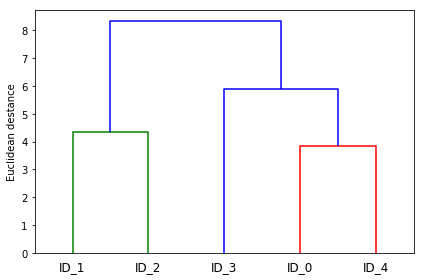

In [46]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters,
                      labels = labels)
plt.ylabel('Euclidean destance')
plt.tight_layout()
plt.show()